In [45]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
%matplotlib inline

In [46]:
# Activation Hill function
def predict_induction(I,x):
    """ Given light intensity I, and parameters x, predict induction level P"""
    a,d,n,c = x
    P = d + a*(I**n)/((I**n) + c)
    return P

# Repression Hill function
def predict_repression(I,x):
    """ Given light intensity I, and parameters x, predict induction level P"""
    a,d,n,c = x
    P = d + a*c/((I**n) + c)
    return P

In [47]:
# Activation Hill function fitting
def loss_activation(x,I,data):
    """squared difference between measured and predicted activity, for an array of data, and parameters x)"""
    diff = np.sum((predict_induction(I,x)-data)**2)
    return diff

# Repression Hill function fitting
def loss_repression(x,I,data):
    """squared difference between measured and predicted activity, for an array of data, and parameters x)"""
    diff = np.sum((predict_repression(I,x)-data)**2)
    return diff

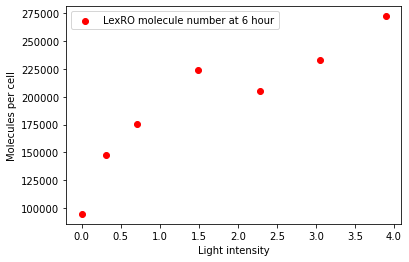

In [48]:
# LexRO data
x1 = np.array([3.9, 3.05, 2.28, 1.49, 0.71, 0.31, 0])
y1 = np.array([272504, 232795, 205329, 224177, 175352, 147264, 94680])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x1,y1,c='red',label='LexRO molecule number at 6 hour')
ax.set_xlabel('Light intensity')
ax.set_ylabel('Molecules per cell')
ax.legend() 
plt.show()

In [59]:
#initial guess for LexRO
x0_guess = np.array([200000,91000,2,2.5])

# fitting parameters for LexRO
res = scipy.optimize.minimize(loss_activation, x0_guess, method='Nelder-Mead', args=(x1,y1))
x_fit = res['x'] # fitted parameter values
x_fit

array([6.02353809e+13, 9.47795139e+04, 4.28814357e-01, 6.54679067e+08])

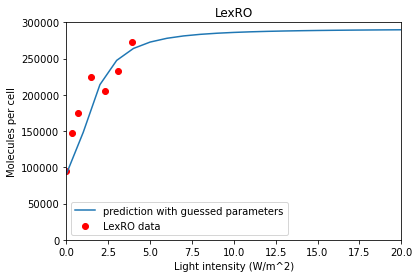

In [60]:
# plot predicted data and experimental data for LexRO
x0 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0,20])
ax.set_ylim([0,300000])
ax.scatter(x1,y1,c = 'red', label = 'LexRO data')
ax.plot(x0, predict_induction(x0,x0_guess),label='prediction with guessed parameters') # plot predictions from parameters
#ax.plot(x0, predict_induction(x0,x_fit),label='prediction with fitted parameters') # plot predictions from fitted parameters
ax.set_xlabel('Light intensity (W/m^2)')
ax.set_ylabel('Molecules per cell')
ax.set_title('LexRO')
ax.legend() 
plt.show()
fig.savefig('10C.pdf',bbox_inches='tight')

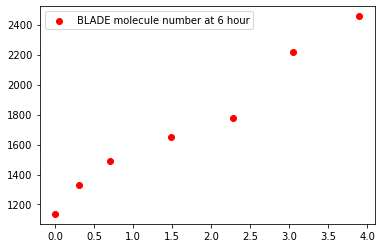

In [61]:
# BLADE data
x2 = np.array([3.9, 3.05, 2.28, 1.49, 0.71, 0.31, 0])
y2 = np.array([2456, 2216, 1778, 1649, 1492, 1333, 1137])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x2,y2,c='red',label='BLADE molecule number at 6 hour')
ax.legend() 
plt.show()

In [62]:
# initial guess for BLADE
x0_guess_2 = np.array([1700,1100,2,4])

# fitting parameters for BLADE
res = scipy.optimize.minimize(loss_activation, x0_guess_2, method='Nelder-Mead', args=(x2,y2))
x_fit_2 = res['x'] # fitted parameter values
x_fit_2

array([1.32420010e+09, 1.21707847e+03, 1.10238282e+00, 4.82060373e+06])

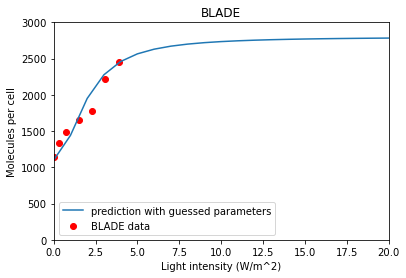

In [63]:
# plot predicted data and experimental data for BLADE
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0,20])
ax.set_ylim([0,3000])
ax.scatter(x2,y2,c='red',label='BLADE data')
ax.plot(x0, predict_induction(x0,x0_guess_2),label='prediction with guessed parameters') # plot predictions from parameters
#ax.plot(x0, predict_induction(x0,x_fit_2),label='prediction with fitted parameters') # plot predictions from fitted parameters
ax.set_xlabel('Light intensity (W/m^2)')
ax.set_ylabel('Molecules per cell')
ax.set_title('BLADE')
ax.legend() 
plt.show()
fig.savefig('10D.pdf',bbox_inches='tight')

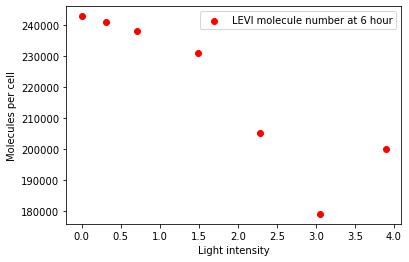

In [64]:
# LEVI data
x3 = np.array([3.9, 3.05, 2.28, 1.49, 0.71, 0.31, 0])
y3 = np.array([200135, 179107, 205211, 231006, 238162, 240919, 242797])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x3,y3,c='red',label='LEVI molecule number at 6 hour')
ax.set_xlabel('Light intensity')
ax.set_ylabel('Molecules per cell')
ax.legend() 
plt.show()

In [65]:
#initial guess for LEVI
x0_guess_3 = np.array([80000,160000,2,6])

# fitting parameters for LEVI
res = scipy.optimize.minimize(loss_repression, x0_guess_3, method='Nelder-Mead', args=(x3,y3))
x_fit_3 = res['x'] # fitted parameter values
x_fit_3

array([5.03586537e+04, 1.89899958e+05, 6.92567178e+00, 9.16063676e+01])

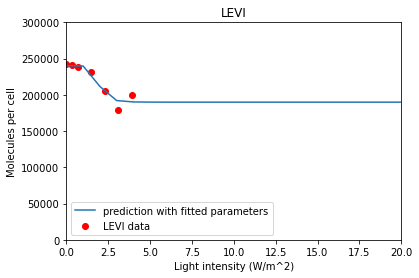

In [56]:
# plot predicted data and experimental data for LEVI
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0,20])
ax.set_ylim([0,300000])
ax.scatter(x3,y3,c='red',label='LEVI data')
#ax.plot(x0, predict_repression(x0,x0_guess_3),label='prediction with guessed parameter') # plot predictions from parameters
ax.plot(x0, predict_repression(x0,x_fit_3),label='prediction with fitted parameters') # plot predictions from fitted parameters
ax.set_xlabel('Light intensity (W/m^2)')
ax.set_ylabel('Molecules per cell')
ax.set_title('LEVI')
ax.legend(loc='lower left') 
plt.show()
fig.savefig('10B.pdf',bbox_inches='tight')